In [21]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#LSTM RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

#Check for stationarity
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-darkgrid')
%matplotlib inline


In [2]:
#https://www.kaggle.com/humamfauzi/multiple-stock-prediction-using-single-nn
#math
#https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

In [3]:
#Root mean sq error (helper function)
def rmse_return(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [27]:
#Import asset in portfolio

def GetData(asset_name):
    return pd.read_csv('Asset_Dataset/'+asset_name+'.csv', usecols=['Date','Adj Close'], parse_dates=True, index_col='Date' ).astype('float32').dropna()
    

Text(0.5, 0, 'Time')

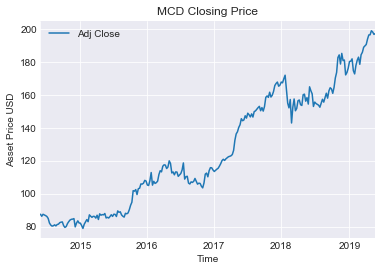

In [28]:
data_MCD = GetData('MCD')
#data_JPM = GetData('JPM')
#data_NVDA = GetData('NVDA')
data_MCD.plot()
plt.title('MCD Closing Price')
plt.ylabel('Asset Price USD')
#plt.ylim(0,500)
plt.xlabel('Time')

In [6]:
###Univariate LSTM###

#early stopping patience
patience = 15
#lstm node count
l_nodes = 32

In [7]:
split_date = '2018-01-01'

train = data_MCD[data_MCD.index<split_date]
test = data_MCD[data_MCD.index>=split_date]

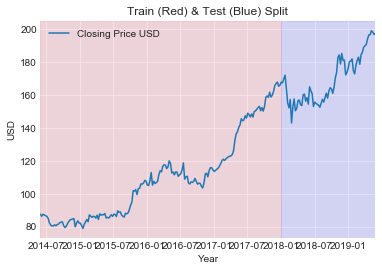

      Training set consists of 72.0% of data


In [8]:
plt.plot(data_MCD, '-', label='By Days')
plt.axvspan(data_MCD.index[0], split_date, color='red', alpha=0.1)
plt.axvspan(split_date, data_MCD.index[-1], color='blue', alpha=0.1)
plt.xlim(data_MCD.index[0],data_MCD.index[-1])
plt.title('Train (Red) & Test (Blue) Split')
plt.legend(['Closing Price USD'])
plt.xlabel('Year')
plt.ylabel('USD')

plt.show()
print('      Training set consists of {}% of data'.format(round(train.shape[0]/data_MCD.shape[0],2)*100))


In [9]:
#NN need values between 0-1
mm = MinMaxScaler()

#mm scalers need to match in shape
train = np.reshape(train.values, (len(train), 1))
train = mm.fit_transform(train)

test = np.reshape(test.values, (len(test),1))
test = mm.transform(test)

#here we are predicting Q days ahead
Q = 1
X_train = train[0:len(train)-Q]
y_train = train[Q:len(train)]

X_test = test[0:len(test)-Q]
y_test = test[Q:len(test)]

X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

In [10]:
Uni_LSTM = 'reset'
# design network
Uni_LSTM = Sequential()
Uni_LSTM.add(LSTM(l_nodes, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
Uni_LSTM.add(Dense(1))
Uni_LSTM.compile(optimizer='adam', loss='mae')
# fit network
history_uni = Uni_LSTM.fit(X_train, y_train, batch_size=1, epochs=100, 
                           validation_data=(X_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=patience)],
                          verbose=-1)

W0814 02:21:59.661337 4572362176 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 02:21:59.702535 4572362176 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 02:21:59.713052 4572362176 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 02:21:59.963988 4572362176 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 02:22:00.133531 4572362176 deprecation.py:323] From //anaconda3/li

Train on 186 samples, validate on 73 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100


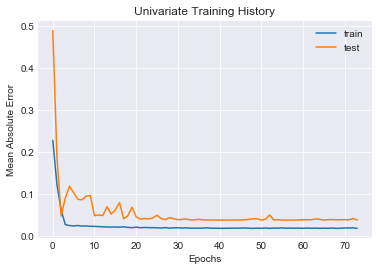

In [11]:
# plot history
plt.plot(history_uni.history['loss'], label='train')
plt.plot(history_uni.history['val_loss'], label='test')
plt.title('Univariate Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [12]:
#finding predictions for test set
predicted_uni = Uni_LSTM.predict(X_test)
predicted_uni = mm.inverse_transform(predicted_uni)[:,0]

y_true = mm.inverse_transform(y_test)

In [13]:
#building dataframe of predictions
pred = pd.DataFrame({'True':y_true.flatten(),'Pred_Uni':predicted_uni.flatten()})
pred.index = data_MCD[data_MCD.index>=split_date][:-1].index

In [14]:
#percent change per day, difference between
pct_ch = pred.pct_change()[1:]
pct_ch = pct_ch[1:]
pct_ch['Uni'] = pct_ch['True'] - pct_ch['Pred_Uni']
pct_ch['Tr'] = 0
pct_ch.index = data_MCD[data_MCD.index>=split_date][1:-2].index

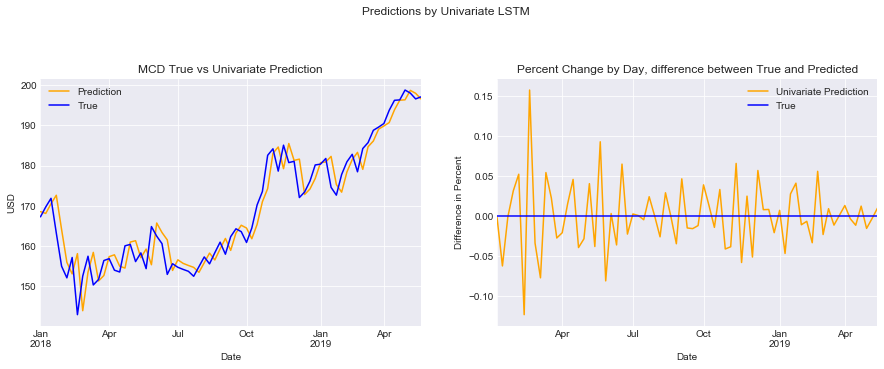

In [22]:
fig = plt.figure(figsize=[15, 10])
plt.suptitle('Predictions by Univariate LSTM')

plt.subplot(221)
pred.Pred_Uni.plot(c='orange')
pred['True'].plot(c='blue')
plt.legend(['Prediction','True'])
plt.title('MCD True vs Univariate Prediction')
plt.ylabel('USD')
plt.xlabel('Date')

plt.subplot(222)
plt.title('Percent Change by Day, difference between True and Predicted')
plt.ylabel('Difference in Percent')
plt.xlabel('Date')
pct_ch.Uni.plot(c='orange')
pct_ch.Tr.plot(c= 'blue')
plt.legend(['Univariate Prediction','True']);
plt.show()

In [16]:
##MULTIVARIATE LSTM##

In [20]:
#import market and econ data
%store -r data_gdp
%store -r data_savings
%store -r data_vix

In [23]:
#market and econ data
data_m = pd.concat([data_savings,data_vix],axis=1)
data_m = data_m.fillna(method='ffill')

In [24]:
data_all = pd.concat([data_MCD,data_m],axis=1).dropna()
data_all.columns = ['MCD_close','Savings','VIX']
data_all

,MCD_close,Savings,VIX
Date,,,
2014-06-02,87.501846,7.5,11.580000
2014-06-09,86.240288,7.5,11.150000
2014-06-16,87.467529,7.5,12.650000
2014-06-23,87.072746,7.5,10.980000
2014-06-30,86.660828,7.5,11.570000
2014-07-07,86.137337,7.5,11.330000
2014-07-14,84.952988,7.5,11.820000
2014-07-21,82.146683,7.5,12.810000
2014-07-28,80.928070,7.5,12.560000


In [36]:
# convert time series to supervised learning
# Using one lag observation as input (x)
# Using one observation as output (y)
def convert_ts_to_supervised(data_in):
    n_vars = 1 if type(data_in) is list else data_all.shape[1]
    df = pd.DataFrame(data_in)
    y = list()
    names = list()
    # Build input sequence
    y.append(df.shift(1))
    names += [('var%d(t-%d)' % (j+1, 1)) for j in range(n_vars)]
    
    # Build forecast sequence 
    y.append(df.shift(-1))
    names += [('var%d(t+%d)' % (j+1, 1)) for j in range(n_vars)]
    
    # Combine input and forecast sequence
    combined_data = pd.concat(y, axis=1)
    combined_data.columns = names

    # Remove missing values
    combined_data.dropna(inplace=True)
    return combined_data


In [26]:
def plot_features(data):
    # Plot only the features:
    # sp500_close price, sp500_volume, VIX_close price
    num_features = [0, 1, 2]
    i = 1
    pyplot.figure(figsize=(10,8))
    for n in num_features:
        pyplot.subplot(len(num_features), 1, i)
        pyplot.plot(values[:, n])
        pyplot.title(data.columns[n], y=0.6, loc='left')
        i += 1
    pyplot.show()


In [30]:
#Engineer the features: normalization and transformation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_in = scaler.fit_transform(data_all)
print(scaled_in)

[[0.06714747 0.48       0.07133758]
 [0.05657608 0.48       0.05764331]
 [0.06685991 0.48       0.10541401]
 [0.06355177 0.48       0.0522293 ]
 [0.06010005 0.48       0.0710191 ]
 [0.05571339 0.48       0.06337579]
 [0.04578898 0.48       0.07898089]
 [0.02227317 0.48       0.11050955]
 [0.01206164 0.48       0.10254776]
 [0.00666793 0.4        0.18407642]
 [0.00839395 0.4        0.15573247]
 [0.01314024 0.4        0.09490445]
 [0.0078905  0.4        0.07515923]
 [0.01485225 0.48       0.08757961]
 [0.01682774 0.48       0.10573248]
 [0.02429047 0.48       0.15222929]
 [0.02677798 0.48       0.13853502]
 [0.02794869 0.48       0.21146495]
 [0.00921868 0.4        0.19490445]
 [0.         0.4        0.48726108]
 [0.00460933 0.4        0.29394903]
 [0.01968107 0.4        0.21337581]
 [0.02970458 0.44       0.17165604]
 [0.03782586 0.44       0.10605095]
 [0.04126473 0.44       0.14808916]
 [0.04221572 0.44       0.10445859]
 [0.04478673 0.56       0.15350317]
 [0.00278837 0.56       0.15

In [37]:
#Convert TS to supervised learning model
reframed = convert_ts_to_supervised(scaled_in)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var1(t+1)  var2(t+1)  var3(t+1)
1   0.067147       0.48   0.071338   0.066860       0.48   0.105414
2   0.056576       0.48   0.057643   0.063552       0.48   0.052229
3   0.066860       0.48   0.105414   0.060100       0.48   0.071019
4   0.063552       0.48   0.052229   0.055713       0.48   0.063376
5   0.060100       0.48   0.071019   0.045789       0.48   0.078981


In [38]:
# Predict only y=SP500_Close(t+1)
# Drop columns SP500_volume(t+1) and VIX_Close(t+1)
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var1(t+1)
1   0.067147       0.48   0.071338   0.066860
2   0.056576       0.48   0.057643   0.063552
3   0.066860       0.48   0.105414   0.060100
4   0.063552       0.48   0.052229   0.055713
5   0.060100       0.48   0.071019   0.045789


In [39]:
# Split into 80% train and 20% test data
values = reframed.values
train_80pct = int(len(values)* 0.8)


In [40]:
train = values[:train_80pct, :]
test = values[train_80pct:, :]

In [41]:
# Split training and test data into input(x) and output(y)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [42]:
# Reshape for LSTM network: [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [43]:
# Design network and fit the model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
fitted = model.fit(train_X, train_y, epochs=200, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 188 samples, validate on 48 samples
Epoch 1/200
 - 2s - loss: 0.2673 - val_loss: 0.7318
Epoch 2/200
 - 0s - loss: 0.2569 - val_loss: 0.7155
Epoch 3/200
 - 0s - loss: 0.2476 - val_loss: 0.6993
Epoch 4/200
 - 0s - loss: 0.2392 - val_loss: 0.6833
Epoch 5/200
 - 0s - loss: 0.2321 - val_loss: 0.6680
Epoch 6/200
 - 0s - loss: 0.2266 - val_loss: 0.6535
Epoch 7/200
 - 0s - loss: 0.2225 - val_loss: 0.6402
Epoch 8/200
 - 0s - loss: 0.2191 - val_loss: 0.6277
Epoch 9/200
 - 0s - loss: 0.2159 - val_loss: 0.6159
Epoch 10/200
 - 0s - loss: 0.2129 - val_loss: 0.6048
Epoch 11/200
 - 0s - loss: 0.2101 - val_loss: 0.5940
Epoch 12/200
 - 0s - loss: 0.2073 - val_loss: 0.5836
Epoch 13/200
 - 0s - loss: 0.2045 - val_loss: 0.5734
Epoch 14/200
 - 0s - loss: 0.2017 - val_loss: 0.5634
Epoch 15/200
 - 0s - loss: 0.1990 - val_loss: 0.5535
Epoch 16/200
 - 0s - loss: 0.1963 - val_loss: 0.5437
Epoch 17/200
 - 0s - loss: 0.1935 - val_loss: 0.5339
Epoch 18/200
 - 0s - loss: 0.1907 - val_loss: 0.5240
Epoch 19/2

Epoch 154/200
 - 0s - loss: 0.0256 - val_loss: 0.0393
Epoch 155/200
 - 0s - loss: 0.0255 - val_loss: 0.0391
Epoch 156/200
 - 0s - loss: 0.0254 - val_loss: 0.0389
Epoch 157/200
 - 0s - loss: 0.0254 - val_loss: 0.0387
Epoch 158/200
 - 0s - loss: 0.0253 - val_loss: 0.0385
Epoch 159/200
 - 0s - loss: 0.0252 - val_loss: 0.0382
Epoch 160/200
 - 0s - loss: 0.0251 - val_loss: 0.0380
Epoch 161/200
 - 0s - loss: 0.0251 - val_loss: 0.0377
Epoch 162/200
 - 0s - loss: 0.0250 - val_loss: 0.0373
Epoch 163/200
 - 0s - loss: 0.0249 - val_loss: 0.0370
Epoch 164/200
 - 0s - loss: 0.0248 - val_loss: 0.0367
Epoch 165/200
 - 0s - loss: 0.0248 - val_loss: 0.0365
Epoch 166/200
 - 0s - loss: 0.0247 - val_loss: 0.0362
Epoch 167/200
 - 0s - loss: 0.0246 - val_loss: 0.0361
Epoch 168/200
 - 0s - loss: 0.0246 - val_loss: 0.0360
Epoch 169/200
 - 0s - loss: 0.0245 - val_loss: 0.0359
Epoch 170/200
 - 0s - loss: 0.0244 - val_loss: 0.0358
Epoch 171/200
 - 0s - loss: 0.0244 - val_loss: 0.0357
Epoch 172/200
 - 0s - loss: 

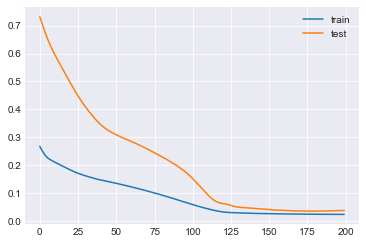

In [45]:
# Plot istory
plt.plot(fitted.history['loss'], label='train')
plt.plot(fitted.history['val_loss'], label='test')
plt.legend()
plt.show()

In [48]:
# Predict SP500 Close Price
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [61]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [63]:
# Reverse scaling to get actual value
test_y = test_y.reshape((len(test_y), 1))
rev_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
rev_y = scaler.inverse_transform(rev_y)
rev_y = rev_y[:,0]
print (rev_y)

[164.812607 162.422043 160.55838  152.889053 155.552811 154.664886
 154.138    153.659866 152.4207   154.83075  157.240845 155.513794
 158.294647 157.918076 162.297058 164.2509   163.543991 160.843964
 164.447281 170.19101  173.539063 182.562119 184.182129 178.624954
 185.085403 180.744049 181.070038 172.040756 173.433685 176.120728
 180.161194 180.35878  174.579636 172.633499 177.790268 182.808746
 178.454926 184.250992 185.722366 188.794373 189.59967  190.484482
 193.775208 196.270599 196.370026 198.825638 198.06012  196.618561]


In [68]:
# Calculate and print RMSE
rmse = math.sqrt(mean_squared_error(rev_y, inv_yhat))
print('RMSE Result: %.5f' % rmse)

RMSE Result: 5.81737
